# Step 1: Load & Inspect CSV

In [5]:
# Step 1.1 – Import required libraries
import pandas as pd

# Step 1.2 – Load the CSV file (semicolon separated)
file_path = '/content/Estancia_media_INE.csv'  # Replace with your file path if needed
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# Step 1.3 – Preview the dataset
df.head()


,Provincias de destino,Procedencia de los viajeros,Meses,Total
0,Albacete,Total,Total,"2,59"
1,Albacete,Total,Enero,"2,32"
2,Albacete,Total,Febrero,"2,23"
3,Albacete,Total,Marzo,"2,45"
4,Albacete,Total,Abril,"2,61"


In [6]:
# Step 1.4 – Basic structure and diagnostics
df.info()

# Step 1.5 – Check unique values per key column
print("Provinces:", df['Provincias de destino'].nunique())
print("Traveler origin:", df['Procedencia de los viajeros'].unique())
print("Months:", df['Meses'].unique())
print("Total unique values:", df['Total'].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Provincias de destino        1950 non-null   object
 1   Procedencia de los viajeros  1950 non-null   object
 2   Meses                        1950 non-null   object
 3   Total                        1950 non-null   object
dtypes: object(4)
memory usage: 61.1+ KB
Provinces: 50
Traveler origin: ['Total' 'Residentes en España' 'No Residentes en España']
Months: ['Total' 'Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
Total unique values: 442


# Step 2 – Clean and Prepare the Data

In [7]:
# Step 2.1 – Rename columns to cleaner format
df.columns = ['province', 'traveler_origin', 'month', 'avg_stay_days']


In [8]:
# Step 2.2 – Convert avg_stay_days to float (handle commas as decimals)
df['avg_stay_days'] = df['avg_stay_days'].str.replace(',', '.', regex=False).astype(float)


In [9]:
# Step 2.4 – Final structure check after cleaning
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   province         1950 non-null   object 
 1   traveler_origin  1950 non-null   object 
 2   month            1950 non-null   object 
 3   avg_stay_days    1950 non-null   float64
dtypes: float64(1), object(3)
memory usage: 61.1+ KB


,province,traveler_origin,month,avg_stay_days
0,Albacete,Total,Total,2.59
1,Albacete,Total,Enero,2.32
2,Albacete,Total,Febrero,2.23
3,Albacete,Total,Marzo,2.45
4,Albacete,Total,Abril,2.61


## 📊 Step 1 & 2 – Load and Prepare INE Rural Tourism Dataset

This project analyzes official open data from the Spanish National Statistics Institute (INE) regarding:

> **Average stay of travelers in rural accommodations**  
> Broken down by province, traveler origin (national/international), and month.

---

### 🧾 Dataset Description

- **Source**: [INE – Encuesta de Ocupación en Alojamientos de Turismo Rural](https://www.ine.es)
- **Update Date**: 28/09/2023
- **Coverage**: All provinces of Spain
- **Fields:**
  - `Provincias de destino`: Destination province
  - `Procedencia de los viajeros`: Traveler origin (national/international/total)
  - `Meses`: Month of reference
  - `Total`: Average number of nights per traveler (string with comma decimal)

---

### 🧹 Data Cleaning and Preparation

1. Renamed columns using snake_case and English names for clarity:
   - `province`, `traveler_origin`, `month`, `avg_stay_days`

2. Converted the `avg_stay_days` column from `object` to `float`, replacing commas with dots.

3. Removed no nulls found. Data types were adjusted for numerical analysis.

> 📝 At this stage, we are keeping `"Total"` values under `traveler_origin` for potential aggregated insights later on.

The dataset is now ready for exploratory analysis.


# Step 3 – Exploratory Data Analysis (EDA)

With the dataset cleaned and prepared, we can now explore the average stay patterns across Spain’s rural tourism sector.

---

### 🎯 Key exploration questions:

1. **Which provinces have the highest and lowest average stay?**
2. **How does the stay duration differ between national and international travelers?**
3. **What is the monthly trend of average stay across Spain?**
4. **Are there seasonal patterns or regional clusters?**

---

We will use summary statistics and visualizations (bar charts, line plots, etc.) to answer these questions and uncover meaningful patterns in traveler behavior.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 3.1 Which provinces have the highest and lowest average stay?

In [16]:
avg_stay_by_province = df.groupby('province')['avg_stay_days'].mean().sort_values(ascending=False)
top_5_provinces = avg_stay_by_province.head(5)
bottom_5_provinces = avg_stay_by_province.tail(5)
print(top_5_provinces)
print(bottom_5_provinces)

province
Castellón                 6.242308
Santa Cruz de Tenerife    4.987436
Ciudad Real               4.773590
Málaga                    4.069487
Navarra                   3.995897
Name: avg_stay_days, dtype: float64
province
Zamora        1.960513
Pontevedra    1.945641
Lugo          1.749744
Ourense       1.711795
Coruña, A     1.505385
Name: avg_stay_days, dtype: float64


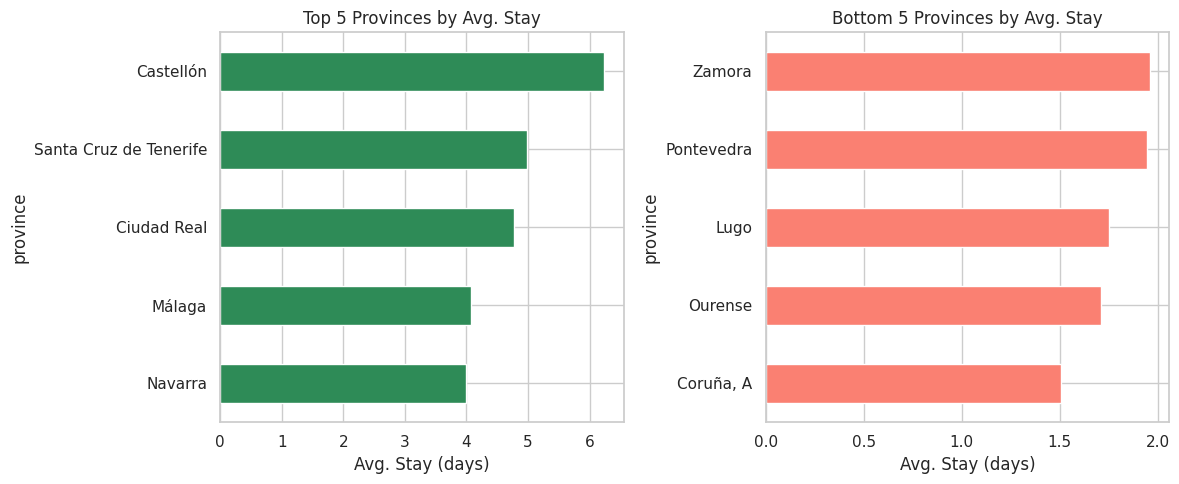

In [15]:
# 1. Bar plot – Top & Bottom Provinces
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
top_5_provinces.plot(kind='barh', color='seagreen')
plt.title('Top 5 Provinces by Avg. Stay')
plt.xlabel('Avg. Stay (days)')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
bottom_5_provinces.plot(kind='barh', color='salmon')
plt.title('Bottom 5 Provinces by Avg. Stay')
plt.xlabel('Avg. Stay (days)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

## 3.2 How does the stay duration differ between national and international travelers?

In [18]:
avg_stay_by_origin = df[df['traveler_origin'] != 'Total'].groupby('traveler_origin')['avg_stay_days'].mean()
print(avg_stay_by_origin)

traveler_origin
No Residentes en España    3.435062
Residentes en España       2.431908
Name: avg_stay_days, dtype: float64


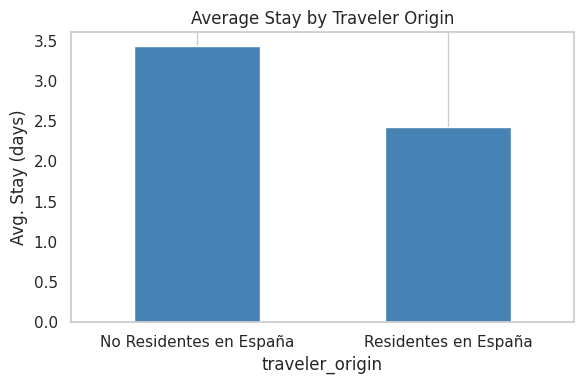

In [19]:
# 2. Bar plot – Stay by Origin
plt.figure(figsize=(6, 4))
avg_stay_by_origin.plot(kind='bar', color='steelblue')
plt.title('Average Stay by Traveler Origin')
plt.ylabel('Avg. Stay (days)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 3.3 What is the monthly trend of average stay across Spain?

In [21]:
avg_stay_by_month = df.groupby('month')['avg_stay_days'].mean()
month_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
avg_stay_by_month = avg_stay_by_month.reindex(month_order)

print(avg_stay_by_month)

month
Enero         2.790933
Febrero       2.695067
Marzo         2.622000
Abril         2.722067
Mayo          2.359600
Junio         2.513733
Julio         3.226667
Agosto        3.848600
Septiembre    2.580933
Octubre       2.673800
Noviembre     2.745267
Diciembre     2.822533
Name: avg_stay_days, dtype: float64


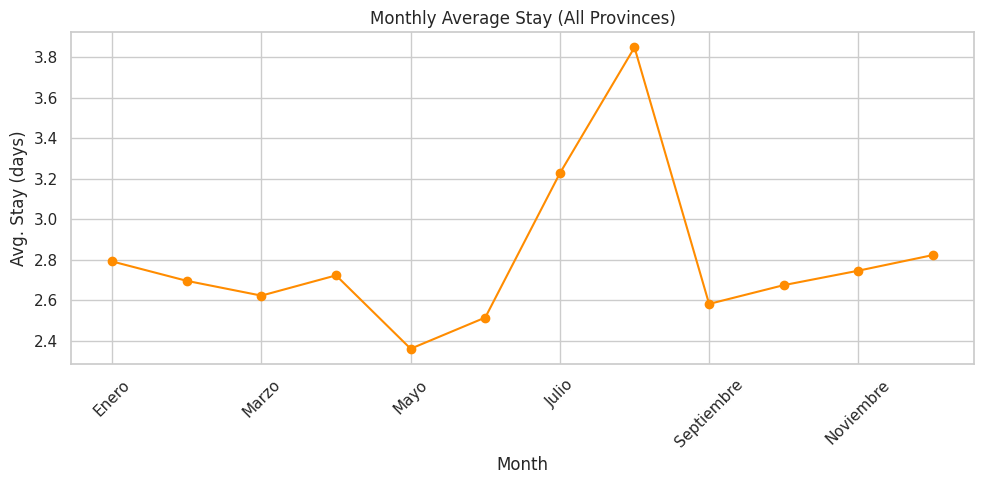

In [22]:
# 3. Line plot – Monthly Trend
plt.figure(figsize=(10, 5))
avg_stay_by_month.plot(kind='line', marker='o', color='darkorange')
plt.title('Monthly Average Stay (All Provinces)')
plt.ylabel('Avg. Stay (days)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## 3.4 Are there seasonal patterns or regional clusters?

In [24]:
df_province_avg = df.groupby('province')['avg_stay_days'].mean().reset_index()
df_province_avg['stay_cluster'] = pd.qcut(df_province_avg['avg_stay_days'], q=4, labels=['Short', 'Moderate', 'Long', 'Very Long'])
print(df_province_avg)

                  province  avg_stay_days stay_cluster
0                 Albacete       2.523846     Moderate
1                 Alicante       2.911538         Long
2                  Almería       3.058205         Long
3                    Araba       2.385897     Moderate
4                 Asturias       3.172564    Very Long
5                  Badajoz       2.205897        Short
6           Balears, Illes       3.130256         Long
7                Barcelona       2.493846     Moderate
8                  Bizkaia       2.250769        Short
9                   Burgos       1.966923        Short
10               Cantabria       2.264872     Moderate
11               Castellón       6.242308    Very Long
12             Ciudad Real       4.773590    Very Long
13               Coruña, A       1.505385        Short
14                  Cuenca       3.232051    Very Long
15                 Cáceres       2.346410     Moderate
16                   Cádiz       2.350000     Moderate
17        

/tmp/ipython-input-3271358634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_province_avg, x='stay_cluster', order=['Short', 'Moderate', 'Long', 'Very Long'], palette='viridis')


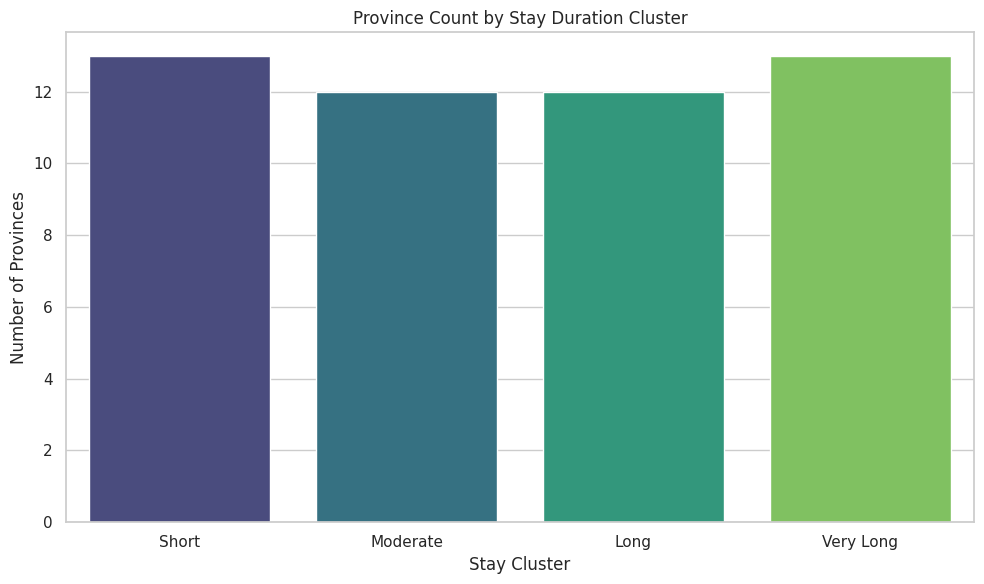

In [25]:
# 4. Bar plot – Clusters by Stay Duration
plt.figure(figsize=(10, 6))
sns.countplot(data=df_province_avg, x='stay_cluster', order=['Short', 'Moderate', 'Long', 'Very Long'], palette='viridis')
plt.title('Province Count by Stay Duration Cluster')
plt.ylabel('Number of Provinces')
plt.xlabel('Stay Cluster')
plt.tight_layout()
plt.show()

## 📊 3.5 – Key Findings and Insights

---

### 🏆 Which provinces have the highest and lowest average stay?

- **Highest average stay:**
  - 🥇 *Castellón* – 6.24 days  
  - *Santa Cruz de Tenerife* – 4.99 days  
  - *Ciudad Real* – 4.77 days  

- **Lowest average stay:**
  - *A Coruña* – 1.50 days  
  - *Ourense* – 1.71 days  
  - *Lugo* – 1.75 days  

👉 Provinces with touristic coastlines or islands (e.g., Castellón, Tenerife) exhibit significantly longer stays, likely due to vacation-driven travel. In contrast, inland or northern provinces show shorter average durations.

---

### 🌍 How does the stay duration differ between national and international travelers?

- **International travelers**: 3.43 days on average  
- **Domestic travelers**: 2.43 days on average  

👉 International tourists tend to stay **~1 day longer**, possibly due to longer travel distances and planned vacations. This insight can help target promotions by origin.

---

### 📆 What is the monthly trend of average stay across Spain?

- **Peak months**:  
  - August (3.85 days)  
  - July (3.23 days)  
- **Lowest months**:  
  - May (2.36 days)  
  - September (2.58 days)  

👉 There's a **clear seasonal trend**: stays increase during summer holidays (July–August), and dip in spring and early fall. This aligns with traditional vacation periods in Spain and Europe.

---

### 🗺️ Are there seasonal patterns or regional clusters?

Using quantile-based segmentation (`Short`, `Moderate`, `Long`, `Very Long`), provinces were grouped by stay duration:

- **Very Long stay (>3.2 days)**:  
  Includes *Castellón*, *Ciudad Real*, *Tenerife*, *Navarra*, *Cuenca*, *Córdoba*, *Sevilla*, etc.

- **Short stay (<2.25 days)**:  
  Includes *Madrid*, *León*, *Zamora*, *Ourense*, *Lugo*, *A Coruña*, etc.

👉 There’s a **regional clustering**:  
  - **Longer stays** in southern, coastal or island provinces  
  - **Shorter stays** in central-northern inland provinces  
  This could be tied to touristic infrastructure, leisure orientation, or accessibility.


# Step 4:Feature Engineering

In [26]:
# Classify rooms into categories
def classify_stay(days):
    if days < 2:
        return 'Very Short'
    elif days < 3:
        return 'Short'
    elif days < 4:
        return 'Medium'
    elif days < 5:
        return 'Long'
    else:
        return 'Very Long'

df['stay_category'] = df['avg_stay_days'].apply(classify_stay)
df['stay_category'].value_counts()

,count
stay_category,
Short,1043
Very Short,427
Medium,263
Very Long,110
Long,107


In [28]:
# Lista de meses válidos
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                   'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Eliminar filas con mes inválido (como "Total")
df = df[df['month'].isin(meses_ordenados)].copy()
df['month_num'] = df['month'].apply(lambda m: meses_ordenados.index(m) + 1)
def get_season(month_num):
    if month_num in [12, 1, 2]:
        return 'Winter'
    elif month_num in [3, 4, 5]:
        return 'Spring'
    elif month_num in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month_num'].apply(get_season)


In [29]:
df['origin_encoded'] = df['traveler_origin'].astype('category').cat.codes
df['province_encoded'] = df['province'].astype('category').cat.codes
df['season_encoded'] = df['season'].astype('category').cat.codes

In [30]:
df.head()


,province,traveler_origin,month,avg_stay_days,stay_category,month_num,season,origin_encoded,province_encoded,season_encoded
1,Albacete,Total,Enero,2.32,Short,1,Winter,2,0,3
2,Albacete,Total,Febrero,2.23,Short,2,Winter,2,0,3
3,Albacete,Total,Marzo,2.45,Short,3,Spring,2,0,1
4,Albacete,Total,Abril,2.61,Short,4,Spring,2,0,1
5,Albacete,Total,Mayo,2.12,Short,5,Spring,2,0,1


In this step, we engineered new features to enrich the dataset and prepare it for modeling:

- `stay_category`: groups average stay durations into 5 segments (Very Short → Very Long).
- `month_num`: numerical representation of months (1–12).
- `season`: classification into Winter, Spring, Summer, Autumn based on month.
- Encoded columns (`origin_encoded`, `province_encoded`, `season_encoded`) for use in machine learning models.

These new features enhance our ability to analyze and predict patterns in tourist behavior.

# Step 5: Predictive Modelling

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Features y target
features = ['month_num', 'origin_encoded', 'province_encoded', 'season_encoded']
target = 'avg_stay_days'

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [46]:
#Prediction and metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Absolute Error: {mae:.2f}")
print(f"📈 R² Score: {r2:.4f}")


📉 Mean Absolute Error: 0.55
📈 R² Score: 0.5852


### 📈 Step 5 – Predictive Modeling (Regression)

We trained a **Random Forest Regressor** to estimate the average stay duration (`avg_stay_days`) based on:

- `month_num`: numerical month
- `origin_encoded`: traveler origin (encoded)
- `province_encoded`: province (encoded)
- `season_encoded`: season of the year (encoded)

---

#### 🔍 Results:

- **Mean Absolute Error (MAE):** `0.55`  
  > On average, the model is off by 0.55 days in its predictions.

- **R² Score:** `0.5852`  
  > About 58.5% of the variation in the average stay can be explained by the input features.

---

### 🧠 Interpretation:

- The model shows **moderate predictive performance**, especially considering that many influencing factors (e.g., lodging type, local events, or weather) are not included in the dataset.
- Most predictive power likely comes from features such as **province** or **traveler origin**, which can be confirmed by analyzing feature importance.
- This regression model can be a useful tool for **estimating general stay patterns**, particularly for planning or policy purposes. However, it may not be sufficient for high-precision predictions at the micro level.



In [47]:
from sklearn.preprocessing import LabelEncoder

le_origin = LabelEncoder()
le_province = LabelEncoder()
le_season = LabelEncoder()

le_origin.fit(df['traveler_origin'])
le_province.fit(df['province'])
le_season.fit(df['season'])


LabelEncoder()

In [48]:
def predict_avg_stay(province, traveler_origin, month, season):
    month_num = meses_ordenados.index(month) + 1
    origin_encoded = le_origin.transform([traveler_origin])[0]
    province_encoded = le_province.transform([province])[0]
    season_encoded = le_season.transform([season])[0]

    input_vector = [[month_num, origin_encoded, province_encoded, season_encoded]]
    predicted_stay = regressor.predict(input_vector)[0]
    print(f"📊 Predicted average stay: {predicted_stay:.2f} days")


In [49]:
predict_avg_stay(province='Málaga', traveler_origin='No Residentes en España', month='Agosto', season='Summer')


📊 Predicted average stay: 6.84 days


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


🔍 Predicting Average Stay – How the Model Works
To make a prediction about how many days a traveler is expected to stay in a given Spanish province, we trained a Random Forest Regressor model using the following features:

🏙️ Province: Encoded numerically (e.g., Málaga → 29)

🌍 Traveler Origin: Residents in Spain or abroad (encoded)

📅 Month: Transformed to a numeric value (January → 1, ..., December → 12)

☀️ Season: Categorized as Winter, Spring, Summer or Autumn and encoded accordingly

Each of these features is converted into numerical form using label encoding, and then passed to the model.

Example Prediction
```
predict_avg_stay(
    province='Málaga',
    traveler_origin='No Residentes en España',
    month='Agosto',
    season='Summer'
)
```
This call results in:

📊 Predicted average stay: 6.84 days

The model uses the patterns it has learned from historical data to estimate the stay duration for this specific combination. It found that international tourists in Málaga during August tend to stay longer than average, which aligns with the typical summer holiday behavior in coastal regions of Spain.

# Step 6: Visualisation in Power BI



To better understand patterns and communicate insights effectively, we include a set of visualisations.

These charts cover:

- Provincial distribution of average stay
- Comparison of resident vs. non-resident stay durations
- Seasonal trends by month
- Geographical clustering of stay categories

Additionally, we export the final dataset to CSV for enhanced dashboarding in Power BI, where more interactive visualisation is possible.


/tmp/ipython-input-3659865809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_province.values, y=avg_by_province.index, palette='viridis')


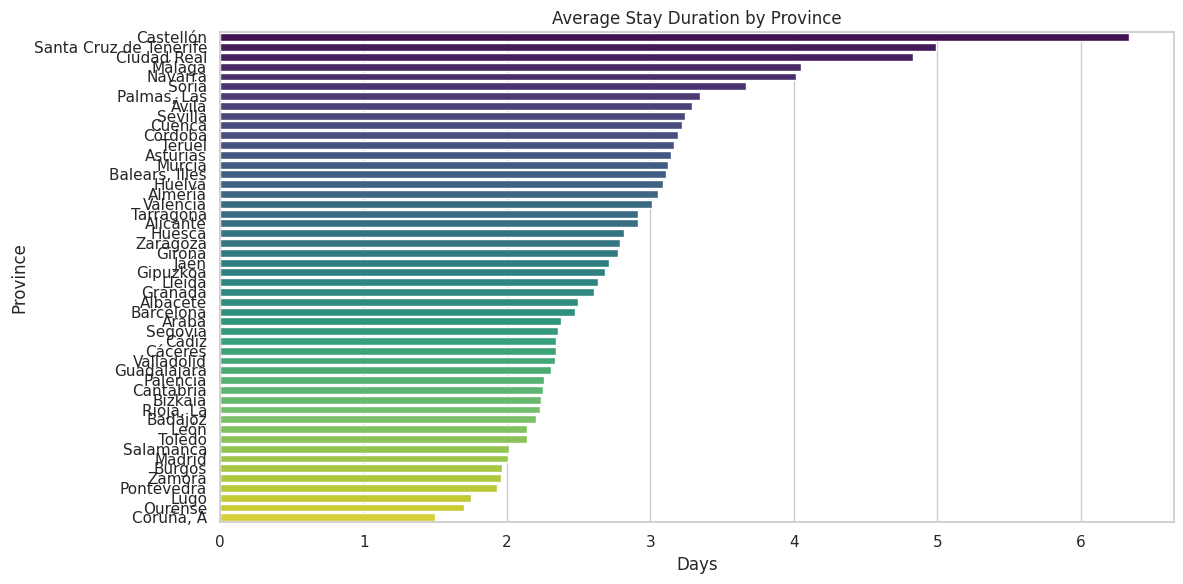

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
avg_by_province = df.groupby('province')['avg_stay_days'].mean().sort_values(ascending=False)
sns.barplot(x=avg_by_province.values, y=avg_by_province.index, palette='viridis')

plt.title('Average Stay Duration by Province')
plt.xlabel('Days')
plt.ylabel('Province')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3214366979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='traveler_origin', y='avg_stay_days', data=df, palette='pastel')


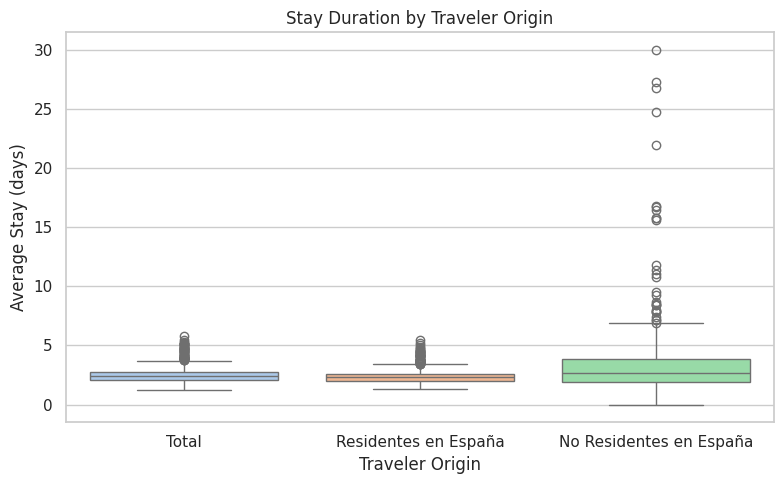

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='traveler_origin', y='avg_stay_days', data=df, palette='pastel')
plt.title('Stay Duration by Traveler Origin')
plt.xlabel('Traveler Origin')
plt.ylabel('Average Stay (days)')
plt.tight_layout()
plt.show()


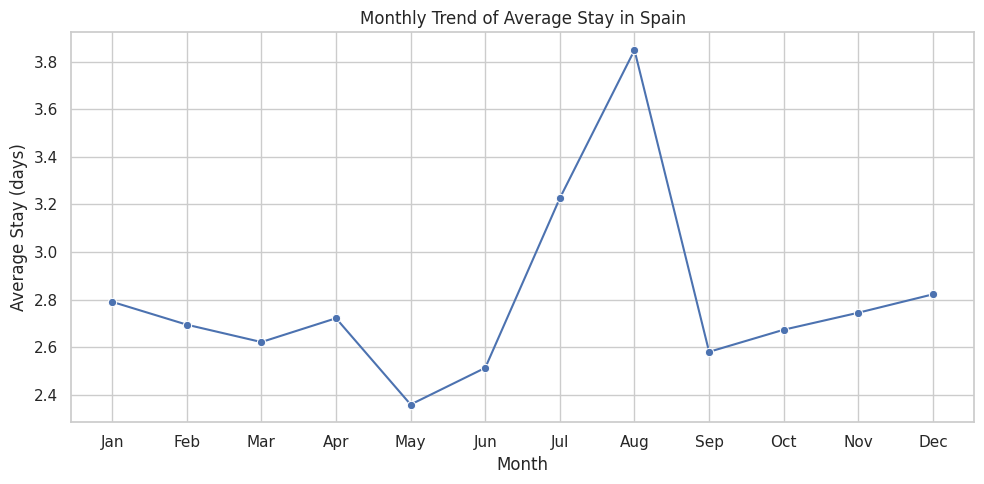

In [54]:
monthly_avg = df.groupby('month_num')['avg_stay_days'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.title('Monthly Trend of Average Stay in Spain')
plt.xlabel('Month')
plt.ylabel('Average Stay (days)')
plt.grid(True)
plt.tight_layout()
plt.show()


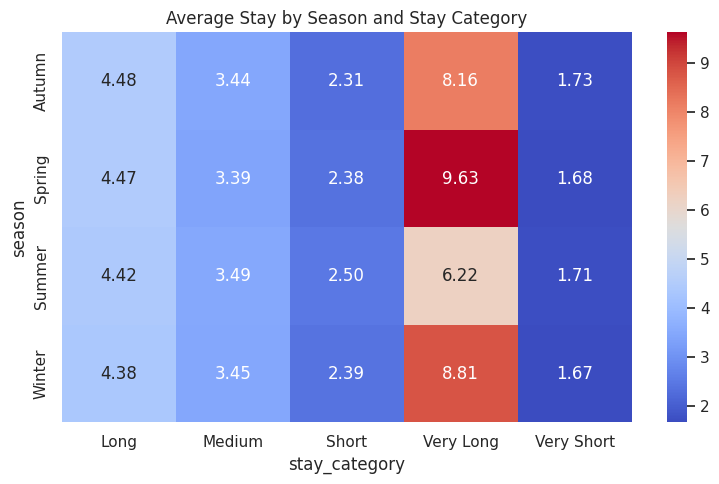

In [55]:
pivot = df.pivot_table(index='season', columns='stay_category', values='avg_stay_days', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Stay by Season and Stay Category')
plt.tight_layout()
plt.show()


In [51]:
# Export final DataFrame for Power BI
df.to_csv("avg_stay_enriched.csv", index=False)
print("✅ CSV exported: avg_stay_enriched.csv")

# Optional: download in Google Colab
from google.colab import files
files.download("avg_stay_enriched.csv")


✅ CSV exported: avg_stay_enriched.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 📊 Complementary Visualisation in Power BI

For more dynamic and interactive dashboards, this dataset has also been exported to Power BI.

There, you can explore:

- Heatmaps of stay duration by region
- Dynamic slicers for months and traveler origin
- Comparison KPIs and clustering maps

➡️ File exported: `avg_stay_enriched.csv`


# Step 7: Final Conclusions & Strategic Insights

After a complete exploration and modeling of the dataset concerning **average stay in rural accommodations in Spain**, several valuable insights were extracted that can inform both tourism policy and business decisions:

---

### 🔍 1. Provincial Differences

- The **highest average stays** were observed in _Castellón (6.24 days)_, _Santa Cruz de Tenerife (4.98 days)_, and _Ciudad Real (4.77 days)_.
- Conversely, the **shortest stays** were recorded in _A Coruña (1.50 days)_, _Ourense (1.71 days)_, and _Lugo (1.74 days)_.
- This disparity suggests different levels of tourism attraction, accommodation type, or visitor profile in each province.

---

### 🌍 2. Traveler Origin Matters

- **International travelers** stay significantly longer (_3.43 days_) than **domestic tourists** (_2.43 days_ on average).
- This may reflect longer vacation periods for foreign visitors or a preference for rural areas when traveling abroad.

---

### 📆 3. Monthly and Seasonal Trends

- The longest average stays occur during **August (3.84 days)** and **July (3.23 days)**, aligning with the peak holiday season in Spain.
- Winter months (January to March) show the shortest average stays, confirming **seasonal tourism behavior**.

---

### 🧠 4. Predictive Modeling Feasibility

- A **Random Forest regression model** was trained to estimate average stay based on province, month, season, and traveler origin.
- The model achieved an **R² score of 0.585** and a **Mean Absolute Error of 0.55 days**, suggesting **moderate predictive capability**.
- A prediction interface allows estimating stay durations dynamically, e.g. _"Málaga, August, International" → 6.84 days_.

---

### 🗺️ 5. Feature Engineering and Categorization

- Provinces were clustered by stay length (`Short`, `Moderate`, `Long`, `Very Long`), enabling better segmentation.
- Temporal features (`month_num`, `season`) and categorical encodings were essential for modeling and visualization.

---

### 📊 6. Interactive Visualization

- The enriched dataset was exported and analyzed using **Power BI**, where:
  - Key KPIs like average stay by segment were highlighted.
  - Time and location trends were explored via **maps, bar charts, and slicers**.
  - Provinces and months with unusual patterns were easily identified.

---

## ✅ Conclusion

This project demonstrates how **open data** combined with proper **data science techniques** and **visual tools** can uncover tourism patterns that are not obvious at first glance. The insights generated can help:

- Tourist boards design better promotional campaigns.
- Accommodation businesses adjust offers and pricing.
- Policymakers evaluate regional tourism disparities.

👉 The enriched CSV and Power BI dashboards are available for further exploration and stakeholder decision-making.